<a href="https://colab.research.google.com/github/lunacandido/deep_learning_pytorch_luna/blob/main/trainingneuralnetworks_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Função de perda

In [ ]:
# minimizar/maximizar a distancia entre um ponto e outro
# valor escalar que permite reduzir aspectos ruins e bons de um sistema complexo
# o objetivo deve ser bem definido
# pontos: regressão e classificação

      ## problema de regressão
## A FUNÇÃO DE PERDA TEM COMO OBJETIVO MINIMIZAR A DISTANCIA ENTRE A PREDIÇÃO (Y') E O RÓTULO (Y)
## FUNÇÕES DE PERDA 
# DISTANCIA ABSOLUTA:   |Y'-Y|
# MSE - MEANS SQUARED ERROR (ERRO) : |Y'-Y|^2

      ## problema de classificação 
# y = probabilidade real de saida (rótulo)
# y' = probabilidade inferida de cada categoria (output) // codificação
#cross-Entropy = minimizar a entropia (avaliando cada par(y',y) )
# quanto maior a predição, menor o erro e vice-versa
#medir o loss é pra avaliar se o treinamento esta melhorando ou piorando

#sintetizando : treinar um modelo para convergir para uma solução ótima
# treinar várias vezes, vai ter vários fowards



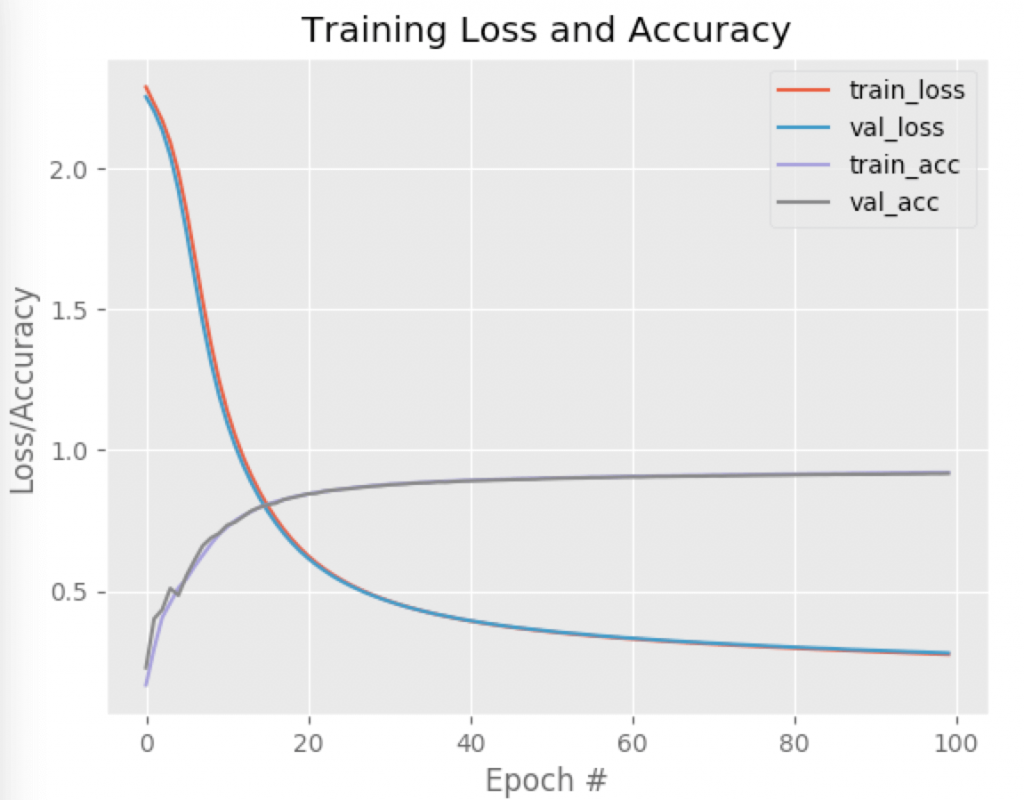

Fonte da imagem: https://www.google.com/url?sa=i&url=https%3A%2F%2Fsigmoidal.ai%2Fredes-neurais-python-keras-2%2F&psig=AOvVaw2vTF2lKGCAvOfkRRNmInCU&ust=1666281732925000&source=images&cd=vfe&ved=0CA4QjhxqFwoTCNih26fV7PoCFQAAAAAdAAAAABAE

Vermelho e azul estão melhorando o treinamento , enquanto as outras duas cores de tom cinza estão piorando

## Classificação

In [ ]:
import torch
from torch import nn

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)
# trabalhando com dados já prontos sklearn
from sklearn import datasets

wine = datasets.load_wine()
data = wine.data ## quantidade de dados
target = wine.target ## as variaveis do conjunto

print(data.shape, target.shape)
print(wine.feature_names, wine.target_names)

## instanciando as camadas

class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size) # camada escondida
    self.relu    = nn.ReLU()   # função de ativação não linear
    self.out     = nn.Linear(hidden_size, out_size) ## camada de saída
    self.softmax = nn.Softmax() # transforma saída em distribuição de probabilidade

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32 ## definindo que a rede possui 32 neurônios para resolver o problema
out_size    = len(wine.target_names) ## numero de classes

net = WineClassifier(input_size, hidden_size, out_size).to(device) #cast na rede

print(net)


cpu
(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] ['class_0' 'class_1' 'class_2']
WineClassifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


## Classificação 1.2

In [ ]:
## instanciando a função de perda
criterion = nn.CrossEntropyLoss().to(device) 
# fazendo o cast para tensores e extraindo as predições
Xtns = torch.from_numpy(data).float()
Ytns = torch.from_numpy(target)

# Cast na GPU
Xtns = Xtns.to(device)
Ytns = Ytns.to(device)

print(Xtns.dtype, Ytns.dtype)

pred = net(Xtns) ## pegando as predições

print(pred.shape, Ytns.shape) ## pego o par (predição , rótulo)
loss = criterion(pred[:5], Ytns[:5])
print(loss)



torch.float32 torch.int64
torch.Size([178, 3]) torch.Size([178])
tensor(0.5514, grad_fn=<NllLossBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## Regressão

In [ ]:

import torch
from torch import nn

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)
# trabalhando com dados já prontos sklearn
from sklearn import datasets

diabetes = datasets.load_diabetes()
data = diabetes.data ## quantidade de dados
target = diabetes.target ## as variaveis do conjunto

print(data.shape, target.shape)
print(diabetes.feature_names)

## instanciando as camadas

class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size) # camada escondida
    self.relu    = nn.ReLU()   # função de ativação não linear
    self.out     = nn.Linear(hidden_size, out_size) ## camada de saída
    self.softmax = nn.Softmax() # transforma saída em distribuição de probabilidade

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32 ## definindo que a rede possui 32 neurônios para resolver o problema
out_size    = 1 ## numero de classes

net = WineClassifier(input_size, hidden_size, out_size).to(device) #cast na rede

print(net)

## no caso da regressão devem ter os rótulos e predições com a mesma dimensão

## instanciando a função de perda
criterion = nn.MSELoss().to(device) 

# fazendo o cast para tensores e extraindo as predições ## fazendo cast diretão
Xtns = torch.from_numpy(data).float().to(device)
Ytns = torch.from_numpy(target).float().to(device)


print(Xtns.dtype, Ytns.dtype)

pred = net(Xtns) ## pegando as predições

print(pred.shape, Ytns.shape) ## pego o par (predição , rótulo)

loss = criterion(pred[:5], Ytns[:5])
print(loss.data)

cpu
(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
WineClassifier(
  (hidden): Linear(in_features=10, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=1, bias=True)
  (softmax): Softmax(dim=None)
)
torch.float32 torch.float32
torch.Size([442, 1]) torch.Size([442])
tensor(21511.4004)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Importante destacar é que na progressão target não é mais uma 'classe' no problema e sim valores contínuos.